In [67]:
# Importing Packages
import matplotlib.pyplot as plt
import random
import numpy as np

In [68]:
# Rates of Students
normal_student_rates = {
    'Rate-Up Char': 0.007,
    '3 Star': 0.023,
    '2 Star': 0.185,
    '1 Star': 0.785
}

# Student Rates during Fest Banners
fest_student_rates = {
    'Rate-Up Char': 0.007,
    'Fest Char': 0.003,
    '3 Star': 0.05,
    '2 Star': 0.185,
    '1 Star': 0.755
}


In [69]:
# Probability Functions

# Pull Function Rate-Up Char
def simulate_pulls_rate(rates, num_pulls):
    rate_up_obtained = False
    for _ in range(num_pulls):
        random_number = random.random()
        cumulative_prob = 0
        for student, prob in rates.items():
            cumulative_prob += prob
            if random_number <= cumulative_prob:
                if student == 'Rate-Up Char':
                    rate_up_obtained = True
                    break
                
        if rate_up_obtained:
            break

    return rate_up_obtained

# Pull Function 3 Star (Including Rate-Up)
def simulate_pulls_3(rates, num_pulls):
    obtained_3_star = False
    for _ in range(num_pulls):
        random_number = random.random()
        cumulative_prob = 0
        for student, prob in rates.items():
            cumulative_prob += prob
            if random_number <= cumulative_prob:
                if student == 'Rate-Up Char' or student == '3 Star':
                    obtained_3_star = True
                    break
                
        if obtained_3_star:
            break

    return obtained_3_star

# Simulate 1 Pull Function
def simulate_pull(rates):
    # Pulling a Random Number
    rand_num = random.random()
    if rand_num < rates['Rate-Up Char']:
        return 'Rate-Up Char'
    elif rand_num < rates['Rate-Up Char'] + rates['3 Star']:
        return '3 Star'
    elif rand_num < rates['Rate-Up Char'] + rates['3 Star'] + rates['2 Star']:
        return '2 Star'
    else:
        return '1 Star'

In [70]:
# Number of simulations
num_simulations = 10000
max_pulls = 200
pulls_interval = 10

In [71]:
# Perform simulations for normal rates
normal_probabilities = []
three_star_probabilities = []
for num_pulls in range(10, max_pulls + 1, pulls_interval):
    rate_up_count = sum(simulate_pulls_rate(normal_student_rates, num_pulls) for _ in range(num_simulations))
    rate_up_probability = rate_up_count / num_simulations
    normal_probabilities.append(rate_up_probability)

    three_star_count = sum(simulate_pulls_3(normal_student_rates, num_pulls) for _ in range(num_simulations))
    three_star_probability = three_star_count / num_simulations
    three_star_probabilities.append(three_star_probability)

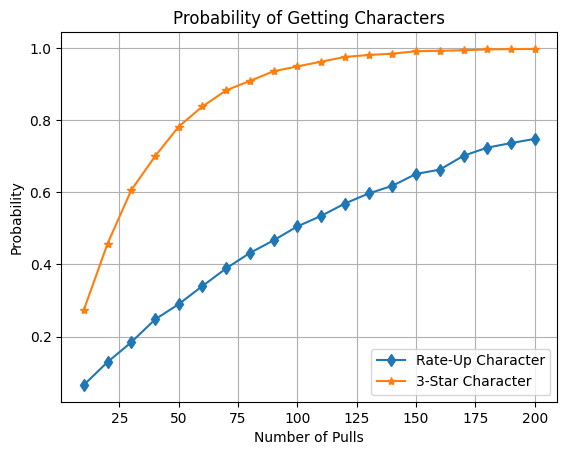

In [72]:
# Plotting
x_values = list(range(10, max_pulls + 1, pulls_interval))

plt.plot(x_values, normal_probabilities, label='Rate-Up Character', marker='d')
plt.plot(x_values, three_star_probabilities, label='3-Star Character', marker='*')
plt.xlabel('Number of Pulls')
plt.ylabel('Probability')
plt.title('Probability of Getting Characters')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# List to store the average number of characters obtained for each interval
average_counts = {'Rate-Up Char': [], '3 Star': [], '2 Star': [], '1 Star': []}

# Iterate over each interval of 10 pulls
for num_pulls in range(10, max_pulls + 1, pulls_interval):
    total_counts = {'Rate-Up Char': 0, '3 Star': 0, '2 Star': 0, '1 Star': 0}
    # Simulate pulling characters 1000 times
    for _ in range(num_simulations):
        # Count the number of characters obtained in a single pull
        for _ in range(num_pulls):
            result = simulate_pull(normal_student_rates)
            total_counts[result] += 1
    # Calculate the average number of characters obtained for this interval
    for key, value in total_counts.items():
        average_counts[key].append(value / num_simulations)


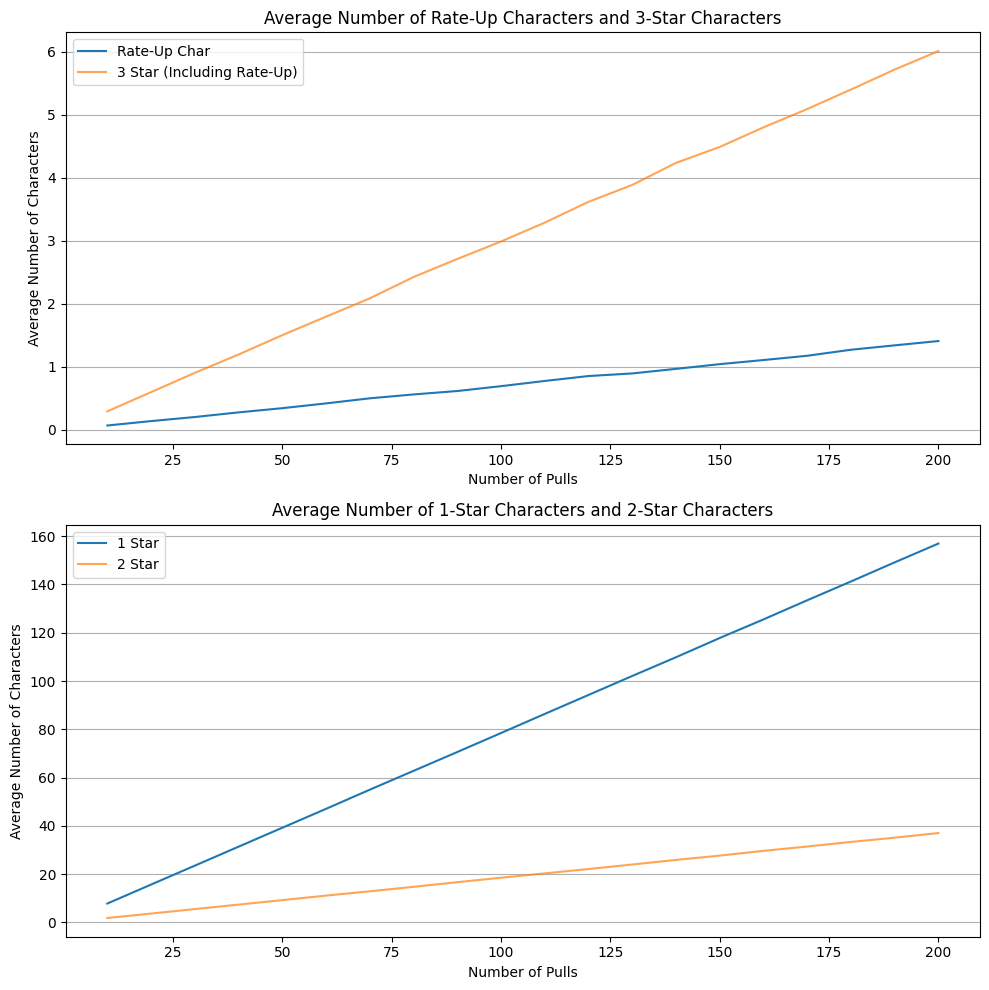

In [74]:
# Plotting
x_values = list(range(10, max_pulls + 1, pulls_interval))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting for 3 stars and rate-ups
axs[0].plot(x_values, average_counts['Rate-Up Char'], label='Rate-Up Char')
axs[0].plot(x_values, [a + b for a, b in zip(average_counts['3 Star'], average_counts['Rate-Up Char'])], label='3 Star (Including Rate-Up)', alpha=0.7)

axs[0].set_xlabel('Number of Pulls')
axs[0].set_ylabel('Average Number of Characters')
axs[0].set_title('Average Number of Rate-Up Characters and 3-Star Characters')
axs[0].legend()
axs[0].grid(axis='y')

# Plotting for 1 star and 2 stars
axs[1].plot(x_values, average_counts['1 Star'], label='1 Star')
axs[1].plot(x_values, average_counts['2 Star'], label='2 Star', alpha=0.7)

axs[1].set_xlabel('Number of Pulls')
axs[1].set_ylabel('Average Number of Characters')
axs[1].set_title('Average Number of 1-Star Characters and 2-Star Characters')
axs[1].legend()
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()